# Summary

This notebook is used to compare the simulated releases from STARFIT reservoirs.



In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

sys.path.append('..')

from pywrdrb.utils.directories import output_dir
from pywrdrb.utils.processing import get_base_results, get_pywr_results
from pywrdrb.utils.lists import reservoir_list, starfit_reservoir_list

In [2]:
start_date = '1983-10-01'
end_date = '2017-01-01'

models = ['nhmv10']

new_res_releases = {}
old_res_releases = {}
new_res_storages = {}
old_res_storages = {}

for model in models:
    new_res_releases[f'{model}'] = get_pywr_results(f'{output_dir}', model, 'res_release').loc[start_date:end_date,:]
    old_res_releases[f'{model}'] = get_pywr_results(f'{output_dir}old_', model, 'res_release').loc[start_date:end_date,:]
    new_res_storages[f'{model}'] = get_pywr_results(f'{output_dir}', model, 'res_storage').loc[start_date:end_date,:]
    old_res_storages[f'{model}'] = get_pywr_results(f'{output_dir}old_', model, 'res_storage').loc[start_date:end_date,:]

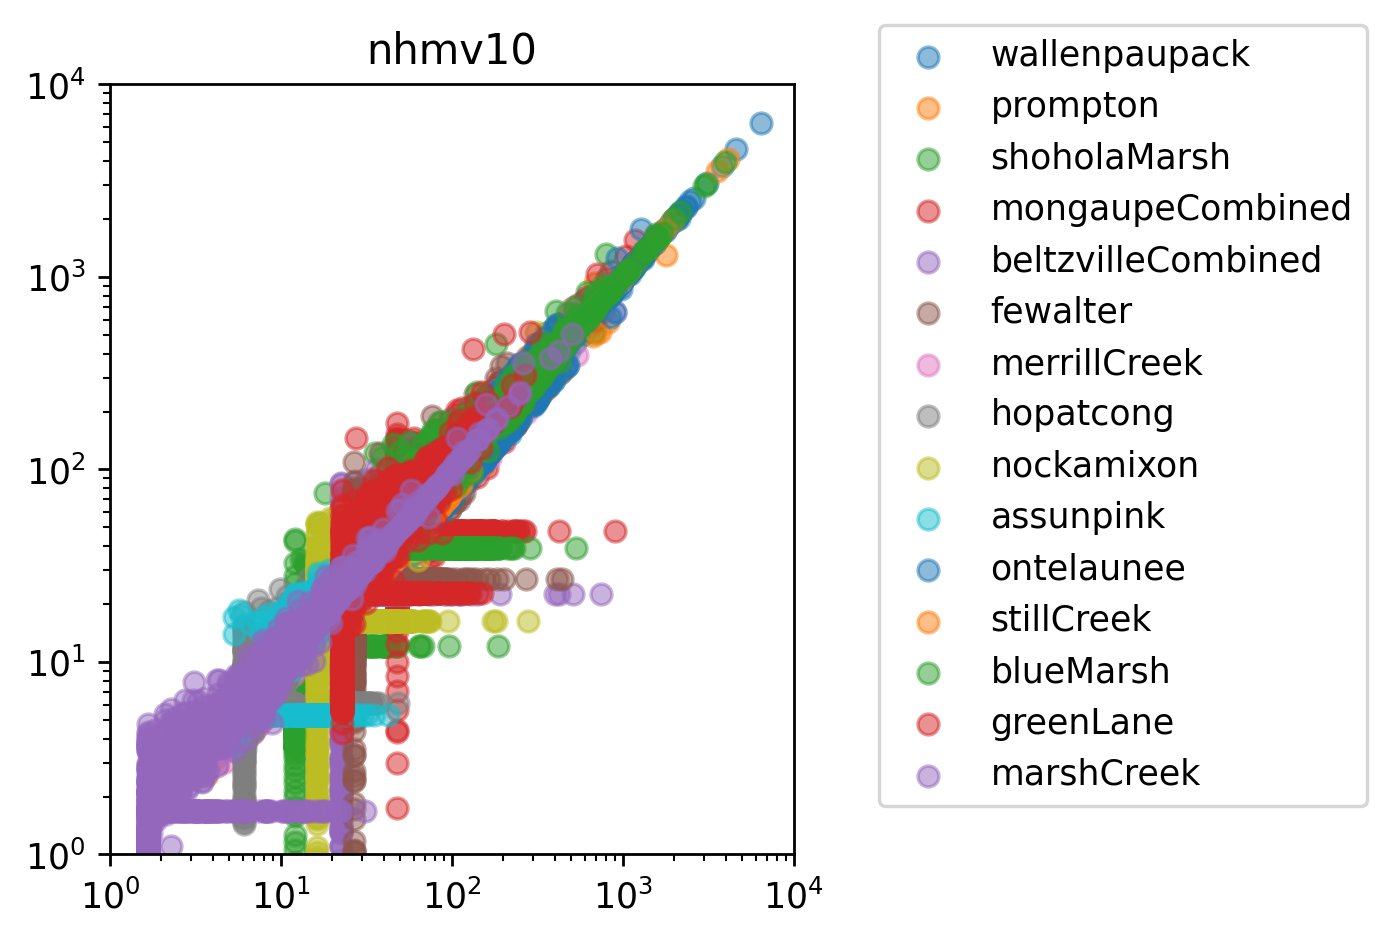

In [18]:
fig = plt.figure(figsize=(12,4), dpi = 250)

for i, model in enumerate(models):
    new = new_res_releases[model][starfit_reservoir_list]
    old = old_res_releases[model][starfit_reservoir_list]
    pos = 131 + i
    
    ax = fig.add_subplot(pos)
    ax.set_title(model)
    for res in starfit_reservoir_list:
        ax.scatter(old[res]['2005-01-01':], new[res]['2005-01-01':], alpha = 0.5, label = res)
    plt.ylim([1,10000])
    plt.xlim([1,10000])
    plt.yscale('log')
    plt.xscale('log')
plt.legend(loc = 'best', bbox_to_anchor=(1.1, 1.1))
plt.show()

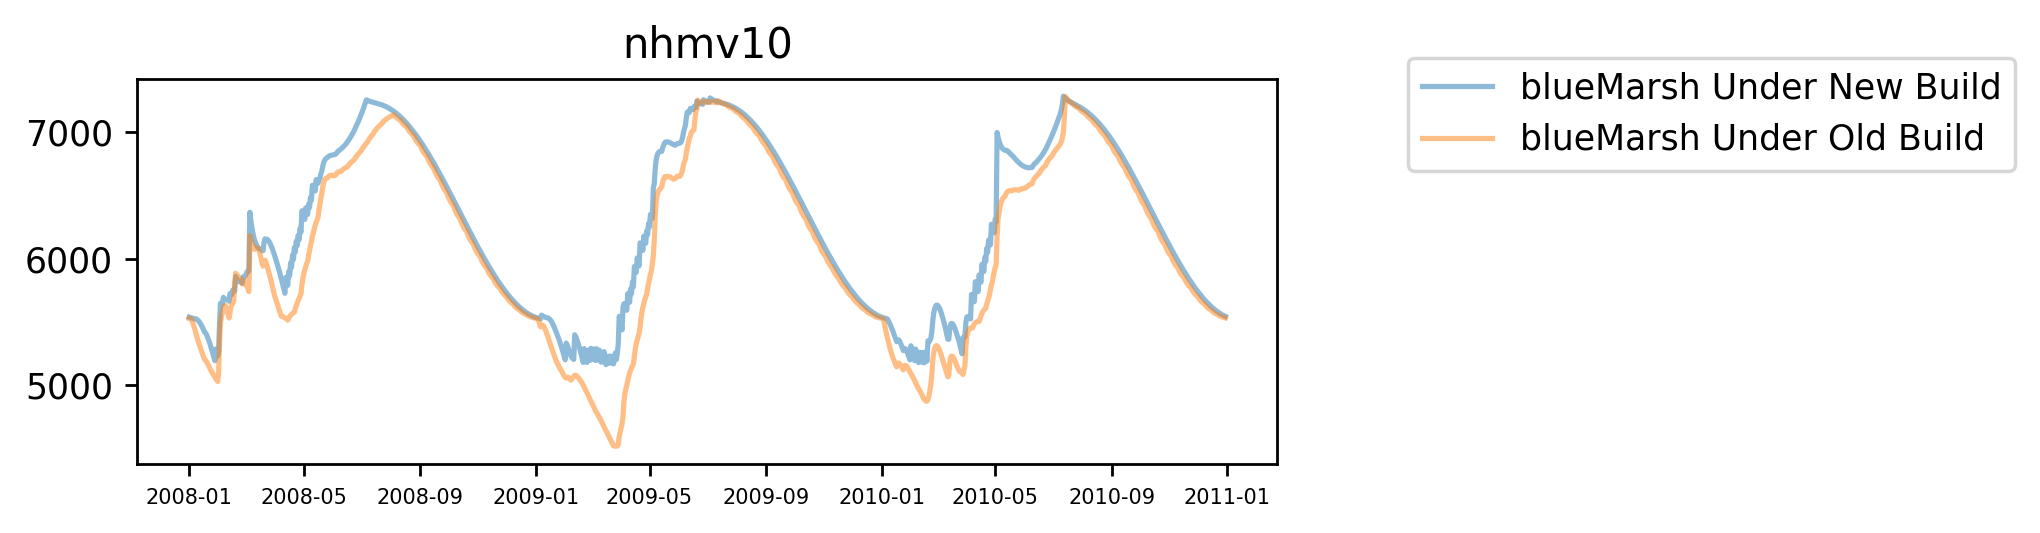

In [17]:
fig = plt.figure(figsize=(20,2), dpi = 250)

for i, model in enumerate(['nhmv10']):
    #new = new_res_releases[model][starfit_reservoir_list]
    #old = old_res_releases[model][starfit_reservoir_list]
    
    new = new_res_storages[model][starfit_reservoir_list]
    old = old_res_storages[model][starfit_reservoir_list]
    
    pos = 131 + i
    
    ax = fig.add_subplot(pos)
    ax.set_title(model)
    start_t = '2008-01-01'
    end_t = '2010-12-30'
    
    for res in ['blueMarsh']:
        ax.plot(pd.date_range(start_t, end_t), new[res][start_t:end_t], alpha = 0.5, label = f'{res} Under New Build')
        ax.plot(pd.date_range(start_t, end_t), old[res][start_t:end_t], alpha = 0.5, label = f'{res} Under Old Build')
    
    #plt.ylim([1,10000])
    #plt.xlim([1,10000])
    
    #plt.xscale('log')
plt.xticks(fontsize = 6)
plt.legend(loc = 'best', bbox_to_anchor=(1.1, 1.1))
plt.show()

In [11]:
new[res]

1999-10-01    29944.755103
1999-10-02    26588.557150
1999-10-03    23709.717945
1999-10-04    21240.040657
1999-10-05    19121.071484
                  ...     
2010-12-27     5555.917509
2010-12-28     5551.911724
2010-12-29     5548.149055
2010-12-30     5544.630617
2010-12-31     5541.357452
Name: blueMarsh, Length: 4110, dtype: float64

In [6]:
period = pd.Period("2012-01-01", freq='D')

WATER_YEAR_OFFSET = 0
c = math.pi*(period.dayofyear + WATER_YEAR_OFFSET)/365 
mu = 15.08
alpha = -0.23
beta = -2.01
NORhi = mu + alpha *math.sin(2*c) + beta *math.cos(2*c)
NORhi

13.066338731273834

In [7]:
math.cos(c)

0.9999629591162655